## 5.1 백테스트란?

일종의 재현 실험으로서 어떤 전략을 가지고 과거로 돌아가서 같은 방법으로 투자한다면 어떻게 되었을지 시뮬레이션 해보는 것이다.
과거 데이터가 부족하지만 무료 데이터로 할 수 있는 것들을 해볼 것이다.

## 5.2 저PBR 주식을 샀다면?

In [1]:
# 필요한 모듈과 데이터 가져오기
import python_quant
import pandas as pd

fs_path = r'C:\\work\\hun\\python_quant\\data\\재무데이터.xlsx'
fs_df = python_quant.get_finance_data(fs_path)
fr_path = r'C:\\work\\hun\\python_quant\\data\\재무비율데이터.xlsx'
fr_df = python_quant.get_finance_data(fr_path)
invest_path = r'C:\\work\\hun\\python_quant\\data\\투자지표데이터.xlsx'
invest_df = python_quant.get_finance_data(invest_path)
price_path = r'C:\\work\\hun\\python_quant\\data\\가격데이터.xlsx'
# price_df = pd.read_excel(price_path)
price_df = pd.read_excel(price_path, index_col=0)

In [2]:
# 2017/12 기준으로 저PBR 종목 20개 가져오기
low_pbr_st = python_quant.get_value_rank(invest_df, 'PBR', '2017/12', 20)
low_pbr_st

,PBR,PBR순위
A064520,0.01,1.0
A012170,0.05,2.0
A017650,0.07,3.0
A000950,0.19,4.0
A002300,0.22,5.0
A001530,0.25,6.5
A009200,0.25,6.5
A212310,0.26,8.5
A900040,0.26,8.5
A011160,0.27,10.0


In [3]:
# 종목코드만 가져오기
low_pbr_st.index

Index(['A064520', 'A012170', 'A017650', 'A000950', 'A002300', 'A001530',
       'A009200', 'A212310', 'A900040', 'A011160', 'A900080', 'A005010',
       'A900110', 'A002200', 'A010100', 'A101930', 'A101000', 'A111820',
       'A010770', 'A024830'],
      dtype='object')

In [4]:
# 위와 같은 종목을 가지고 2018년 6월 첫 번째날 동일 비중으로 주식을 사서 포트폴리오를 꾸린다고 가정하자.
# 이를 위해 가격 데이터프레임에서 위 종목에 해당하는 주식들의 2018년 6월 첫 번째 날의 가격 데이터를 가져와야 한다.

code_list = []
for code in low_pbr_st.index:
    code_list.append(code.replace('A','')) 
# 재무 관련 데이터가 있는 데이터프레임에는 종목코드가 'A000000' 형태로 되어 있고 가격 데이터프레임에는 '000000' 형태로 저장되어 있어 변경
# code_list

pbr_price = price_df[code_list]['2018-06-01':] # 2018-6월 첫날부터 시작하게 만드는 코드
pbr_price

,064520,012170,017650,000950,002300,001530,009200,212310,900040,011160,900080,005010,900110,002200,010100,101930,101000,111820,010770,024830
2018-06-01,2806.0,549.0,1860.0,25600.0,24850.0,58647.0,3790.0,9430.0,784.0,3059.0,727.0,16900.0,513.0,25250.0,2120.0,6460.0,4600.0,4245.0,6300.0,8100.0
2018-06-04,2817.0,549.0,1840.0,25500.0,24450.0,59903.0,3825.0,9100.0,791.0,3021.0,726.0,16900.0,513.0,24150.0,2095.0,6460.0,4600.0,4273.0,6250.0,7840.0
2018-06-05,2839.0,565.0,1855.0,25800.0,24850.0,60000.0,3790.0,8690.0,791.0,3045.0,724.0,17200.0,511.0,23850.0,2030.0,6050.0,4600.0,4300.0,6290.0,7980.0
2018-06-07,2882.0,556.0,1880.0,25150.0,24550.0,60870.0,3970.0,8690.0,805.0,2969.0,723.0,18100.0,527.0,23700.0,2040.0,6010.0,4600.0,4601.0,6320.0,8200.0
2018-06-08,2871.0,543.0,1870.0,24500.0,24250.0,60193.0,3760.0,9210.0,805.0,2974.0,734.0,17450.0,516.0,23650.0,2010.0,6130.0,4600.0,4514.0,6930.0,8200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,1005.0,150.0,1600.0,19200.0,19300.0,67100.0,1970.0,5970.0,NaN,NaN,197.0,6440.0,230.0,19400.0,2045.0,4640.0,884.0,2465.0,2985.0,6280.0
2020-07-01,1005.0,150.0,1600.0,18700.0,19300.0,66700.0,1970.0,5200.0,NaN,NaN,197.0,6510.0,230.0,19250.0,2100.0,4480.0,881.0,2465.0,2930.0,6280.0
2020-07-02,1005.0,150.0,1600.0,18600.0,19300.0,66500.0,1985.0,5880.0,NaN,NaN,197.0,6500.0,230.0,19150.0,2320.0,4515.0,881.0,2465.0,2930.0,6280.0
2020-07-03,1005.0,150.0,1600.0,20300.0,19300.0,67300.0,2000.0,5990.0,NaN,NaN,197.0,6500.0,230.0,19150.0,2235.0,4655.0,882.0,2465.0,2920.0,6280.0


In [5]:
# 위 데이터프레임의 첫번째 행에 있는 가격들이 포폴을 구성할 때의 가격들이다. 종목당 500만원씩 사보자
pf_stock_num = {} # 주식 종목 : 개수
stock_amount = 0

for code in pbr_price.columns:
    temp = int(5000000/pbr_price[code][0])
    pf_stock_num[code] = temp
    stock_amount = stock_amount + temp*pbr_price[code][0]
    
cash_amount = 100000000 - stock_amount # 현금성 자산
print(pf_stock_num)
print(cash_amount)

{'064520': 1781, '012170': 9107, '017650': 2688, '000950': 195, '002300': 201, '001530': 85, '009200': 1319, '212310': 530, '900040': 6377, '011160': 1634, '900080': 6877, '005010': 295, '900110': 9746, '002200': 198, '010100': 2358, '101930': 773, '101000': 1086, '111820': 1177, '010770': 793, '024830': 617}
73980.0


In [6]:
# 1년 동안 유지한다고 했을 때의 전체 포폴의 움직임을 구해보자
stock_pf = 0
for code in pbr_price.columns:
    stock_pf = stock_pf + pbr_price[code] * pf_stock_num[code] 
# 데이터프레임의 하나의 칼럼으로 시리즈를가져오고 숫자 하나를 곱하면 시리즈 안의 전체 데이터에 종목개수가 곱해진다
# 모든 종목에 관해서 가격 데이터 시리즈와 해당 종목의 개수를 곱해 다 더하면 포폴의 시간별 액면 가치가 데이터로 들어 있는 시리즈로 완성된다.
stock_pf

2018-06-01     99926020.0
2018-06-04     99301782.0
2018-06-05     99125425.0
2018-06-07    100167985.0
2018-06-08     99935450.0
                 ...     
2020-06-30            NaN
2020-07-01            NaN
2020-07-02            NaN
2020-07-03            NaN
2020-07-06            NaN
Length: 515, dtype: float64

In [7]:
# 2019-05 까지 끊어서 데이트프레임으로 보자
low_pbr_backtest = pd.DataFrame({'주식포트폴리오':stock_pf[:'2019-5']})
low_pbr_backtest

,주식포트폴리오
2018-06-01,99926020.0
2018-06-04,99301782.0
2018-06-05,99125425.0
2018-06-07,100167985.0
2018-06-08,99935450.0
...,...
2019-05-27,69959577.0
2019-05-28,70443873.0
2019-05-29,69287197.0
2019-05-30,69741751.0


In [8]:
# 주식 포폴 옆에 현금 포폴 칼럼을 만들어보자.
low_pbr_backtest['현금포트폴리오'] = [cash_amount] * len(low_pbr_backtest)
low_pbr_backtest

,주식포트폴리오,현금포트폴리오
2018-06-01,99926020.0,73980.0
2018-06-04,99301782.0,73980.0
2018-06-05,99125425.0,73980.0
2018-06-07,100167985.0,73980.0
2018-06-08,99935450.0,73980.0
...,...,...
2019-05-27,69959577.0,73980.0
2019-05-28,70443873.0,73980.0
2019-05-29,69287197.0,73980.0
2019-05-30,69741751.0,73980.0


In [9]:
# 이제 주식포폴과 현금포폴을 합쳐 종합 포폴 칼럼으로 저장하자
low_pbr_backtest['종합포트폴리오'] = low_pbr_backtest['주식포트폴리오'] + low_pbr_backtest['현금포트폴리오']
low_pbr_backtest['일변화율'] = low_pbr_backtest['종합포트폴리오'].pct_change()

In [10]:
# 초기 투자금, 1억 대비 종합포폴의 변화율을 살펴보자
low_pbr_backtest['총변화율'] = low_pbr_backtest['종합포트폴리오']/100000000 - 1
low_pbr_backtest

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2018-06-01,99926020.0,73980.0,100000000.0,NaN,0.000000
2018-06-04,99301782.0,73980.0,99375762.0,-0.006242,-0.006242
2018-06-05,99125425.0,73980.0,99199405.0,-0.001775,-0.008006
2018-06-07,100167985.0,73980.0,100241965.0,0.010510,0.002420
2018-06-08,99935450.0,73980.0,100009430.0,-0.002320,0.000094
...,...,...,...,...,...
2019-05-27,69959577.0,73980.0,70033557.0,-0.004358,-0.299664
2019-05-28,70443873.0,73980.0,70517853.0,0.006915,-0.294821
2019-05-29,69287197.0,73980.0,69361177.0,-0.016403,-0.306388
2019-05-30,69741751.0,73980.0,69815731.0,0.006553,-0.301843


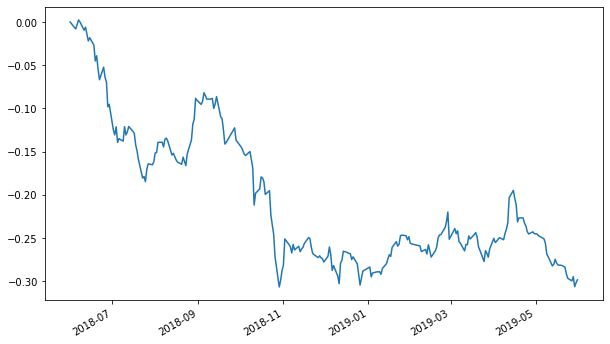

In [11]:
# 한눈에 볼 수 있게 2018년 6월부터 1년간 저PBR 20개로 구성된 포폴의 가치가 어떻게 변했는지 그래프로 그려보자
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
low_pbr_backtest['총변화율'].plot()
plt.show()

## 5.3 첫 번째 백테스트 함수 만들고 여러 전략 비교해보기

In [12]:
# 앞 과정들을 일반화하여 함수로 만듬 low_pbr_df -> strategy_df
def backtest_beta(price_df, strategy_df, start_date, end_date, initial_money):

    code_list = []
    for code in strategy_df.index:
        code_list.append(code.replace('A',''))

    strategy_price = price_df[code_list][start_date:end_date]

    pf_stock_num = {}
    stock_amount = 0
    stock_pf = 0
    each_money = initial_money / len(strategy_df)
    for code in strategy_price.columns:
        temp = int( each_money / strategy_price[code][0] )
        pf_stock_num[code] = temp
        stock_amount = stock_amount + temp * strategy_price[code][0]
        stock_pf = stock_pf + strategy_price[code] * pf_stock_num[code]

    cash_amount = initial_money - stock_amount

    backtest_df = pd.DataFrame({'주식포트폴리오':stock_pf})
    backtest_df['현금포트폴리오'] = [cash_amount] * len(backtest_df)
    backtest_df['종합포트폴리오'] = backtest_df['주식포트폴리오'] + backtest_df['현금포트폴리오']
    backtest_df['일변화율'] = backtest_df['종합포트폴리오'].pct_change()
    backtest_df['총변화율'] = backtest_df['종합포트폴리오']/initial_money - 1
    
    return backtest_df

In [13]:
# 저PER 백테스트
strategy_date = '2017/12'
start_date = '2018-6'
end_date = '2019-5'
initial_money = 100000000

low_per = python_quant.get_value_rank(invest_df, 'PER', strategy_date, 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)
# 책에선 get_value_rank() 함수에서 에러가 난다. 기간이 다를때 비상장 회사의 경우 invest_df 값에 NaN이 들어갈 수 있기 때문.

In [14]:
# 위 에러를 해결하기 위해 재무 관련 데이터프레임에서 빼버려서 get_value_rank() 사용하더라도 골라지지 않게 하자.
price_df[start_date].iloc[0] # 결과 시리즈에 NaN이 있다면 아직 상장이 안되었거나 해서 빠진 종목들이다.

060310     3200.0
095570     6600.0
068400    11800.0
006840    80700.0
054620     5900.0
           ...   
189980     1761.0
000540     6300.0
003280     1542.0
037440     5950.0
238490     7063.0
Name: 2018-06-01 00:00:00, Length: 2266, dtype: float64

In [15]:
# 위 데이터에서 NaN으로 가격이 빠진 종목은 빼 버리고, 나머지 종목들의 코드만 가져오자.
price_df[start_date].iloc[0].dropna().index

Index(['060310', '095570', '068400', '006840', '054620', '265520', '211270',
       '027410', '282330', '138930',
       ...
       '084110', '145020', '069260', '024060', '010240', '189980', '000540',
       '003280', '037440', '238490'],
      dtype='object', length=2162)

In [16]:
# 위 종목코드에 'A' 붙이기
new_code_list = [] # 당시 가격이 있는 종목만 남게됨
for code in price_df[start_date].iloc[0].dropna().index:
    new_code_list.append('A'+code)
# new_code_list

In [17]:
# 해당 날짜에 가격이 없으면 투자 관련 데이터에서 해당 종목 없애는 함수
# 재무재표, 재무비율, 투자지표 데이터프레임에서 start_date에 가격이 없으면 해당 종목을 없애는 함수

def select_code_by_price(price_df, data_df, start_date):
    new_code_list = []
    for code in price_df[start_date].iloc[0].dropna().index:
        new_code_list.append('A' + code)
    
#     selected_df = data_df.loc[new_code_list] # 현재 pandas 버전에서는 key error, 책에선 warning
    selected_df = data_df.reindex(new_code_list)
    return selected_df

In [18]:
# 다시 저PER 포폴 백테스트
strategy_date = '2017/12'
start_date = '2018-6'
end_date = '2019-5'
initial_money = 100000000

low_per = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', strategy_date, 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)
per_backtest

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2018-06-01,99741932.0,258068.0,100000000.0,NaN,0.000000
2018-06-04,99902898.0,258068.0,100160966.0,0.001610,0.001610
2018-06-05,100631049.0,258068.0,100889117.0,0.007270,0.008891
2018-06-07,102878725.0,258068.0,103136793.0,0.022279,0.031368
2018-06-08,102172622.0,258068.0,102430690.0,-0.006846,0.024307
...,...,...,...,...,...
2019-05-27,124206725.0,258068.0,124464793.0,0.004428,0.244648
2019-05-28,127235781.0,258068.0,127493849.0,0.024337,0.274938
2019-05-29,126951323.0,258068.0,127209391.0,-0.002231,0.272094
2019-05-30,127387193.0,258068.0,127645261.0,0.003426,0.276453


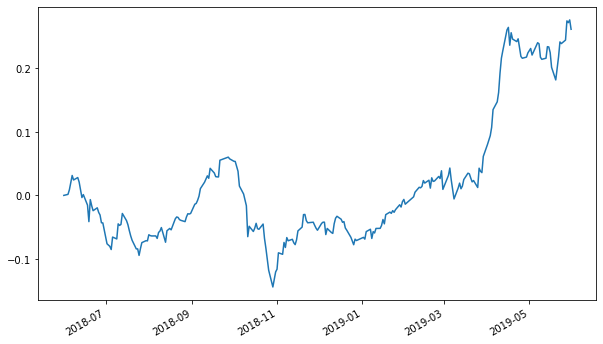

In [19]:
# 저PER 전략 백테스트 그래프
plt.figure(figsize=(10, 6))
per_backtest['총변화율'].plot()
plt.show()

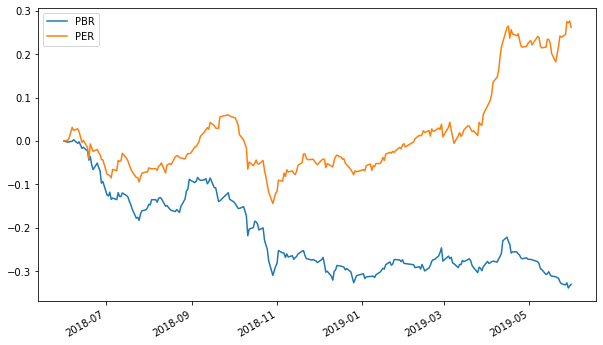

In [20]:
# 저PBR, 저PER 전랴 비교하기
strategy_date = '2017/12'
start_date = '2018-6'
end_date = '2019-5'
initial_money = 100000000

low_pbr = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PBR', strategy_date, 20)
low_per = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', strategy_date, 20)

pbr_backtest = backtest_beta(price_df, low_pbr, start_date, end_date, initial_money)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

plt.figure(figsize=(10, 6))
pbr_backtest['총변화율'].plot(label='PBR')
per_backtest['총변화율'].plot(label='PER')
plt.legend()
plt.show()

           PBR   PBR순위
A064520   0.00     1.0
A012170   0.05     2.0
A223310   0.13     3.0
A017650   0.17     4.0
A101000   0.22     5.0
...        ...     ...
A233990  15.91  1607.0
A041960  20.53  1608.0
A067370  21.97  1609.0
A127120  23.62  1610.0
A250300  27.65  1611.0

[1611 rows x 2 columns] 322


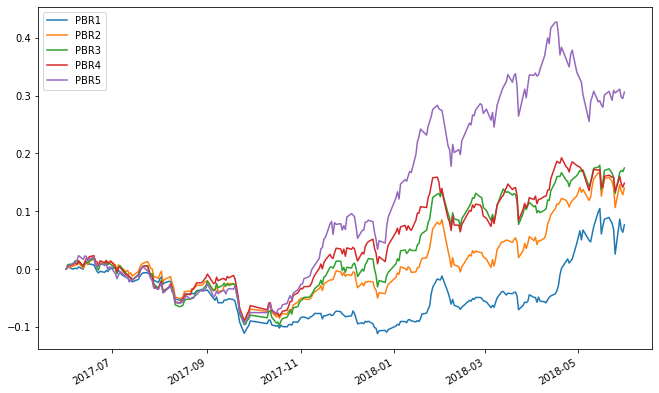

In [21]:
# PBR을 하위 20%, 그 다음 20% 등으로 5개 구간을 나누어 포폴을 구성하고 수익률 움직음을 보자
# 기간에 따라 전략 결과가 다르다

strategy_date = '2016/12'
start_date = '2017-6'
end_date = '2018-5'
initial_money = 100000000

all_pbr = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PBR', strategy_date, None).dropna()
# get_value_rank에 옵션을 None으로 넣어 전체 종목이 오름차순 정렬된 데이터프레임 반환함

length = int(len(all_pbr)/5)
print(all_pbr, length) # 

pbr_backtest1 = backtest_beta(price_df, all_pbr[:length], start_date, end_date, initial_money)
pbr_backtest2 = backtest_beta(price_df, all_pbr[length:length*2], start_date, end_date, initial_money)
pbr_backtest3 = backtest_beta(price_df, all_pbr[length*2:length*3], start_date, end_date, initial_money)
pbr_backtest4 = backtest_beta(price_df, all_pbr[length*3:length*4], start_date, end_date, initial_money)
pbr_backtest5 = backtest_beta(price_df, all_pbr[length*4:length*5], start_date, end_date, initial_money)

plt.figure(figsize=(11, 7))
pbr_backtest1['총변화율'].plot(label='PBR1')
pbr_backtest2['총변화율'].plot(label='PBR2')
pbr_backtest3['총변화율'].plot(label='PBR3')
pbr_backtest4['총변화율'].plot(label='PBR4')
pbr_backtest5['총변화율'].plot(label='PBR5')
plt.legend()
plt.show()

C:\work\hun\python_quant\python_quant.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fscore_df['당기순이익점수'] = fscore_df['당기순이익'] > 0
C:\work\hun\python_quant\python_quant.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fscore_df['영업활동점수'] = fscore_df['영업활동으로인한현금흐름'] > 0
C:\work\hun\python_quant\python_quant.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

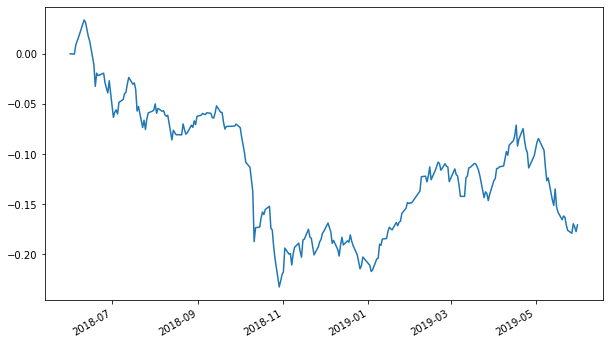

In [22]:
# fscore 백테스트

strategy_date = '2017/12'
start_date = '2018-6'
end_date = '2019-5'
initial_money = 100000000

f_score_result = python_quant.get_fscore(select_code_by_price(price_df, fs_df, start_date), strategy_date, 20)
f_score_backtest = backtest_beta(price_df, f_score_result, start_date, end_date, initial_money)

plt.figure(figsize=(10, 6))
f_score_backtest['총변화율'].plot()
plt.show()

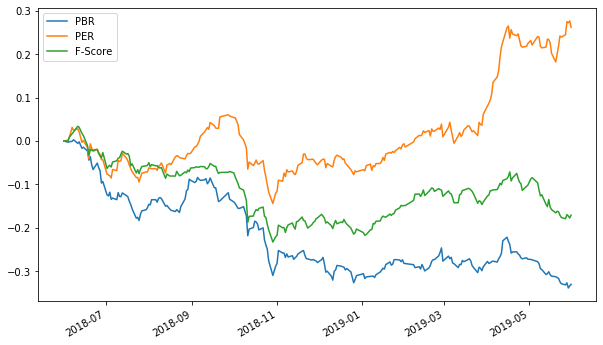

In [23]:
# fscore, 저PER, 저PBR 전략 함께 비교
plt.figure(figsize=(10, 6))
pbr_backtest['총변화율'].plot(label='PBR')
per_backtest['총변화율'].plot(label='PER')
f_score_backtest['총변화율'].plot(label='F-Score')
plt.legend()
plt.show()

## 5.4 백테스트 함수에 리밸런싱 기능 추가하기

In [24]:
"""
앞에서 만든 백테스트 함수는 날짜가 3개인데 3개를 다 알 필요가 없다.
start_date = 2017-6, end_date = 2018-5 와 같이 백테스트의 시작 날짜와 끝나는 날짜만 정해지면 어떤 날짜의 데이터를 이용해
전략을 구현할지는 자동으로 정해지기 때문이다.
12월 재무 데이터를 다음 연도 6월에 모두 사용할 수 있다고 가정하였으므로, 1월부터 5월 사이 기간에서 백테스트를 하려면 2년전 데이터를사용해야
한다. 
"""

# 위 내용을 코드로 바꿔 백테스트 기간이 주어지면 '전략 기준 날짜'를 자동으로 계산해주는 코드를 만들어보자.

def get_strategy_date(start_date):
    temp_year = int(start_date.split('-')[0])
    temp_month = start_date.split('-')[1]
    
    if temp_month in '1 2 3 4 5'.split(' '):
        strategy_date = str(temp_year - 2) + '/12'
    else:
        strategy_date = str(temp_year -1) + '/12'
    return strategy_date

In [25]:
"""
이제 백테스트 기간이 주어졌을 때 이를 리밸런싱 구간별로 나누는 코드를 만들어보자
예를 들어, 백테스트 구간이 start_date='2015-6', end_date='2018-5' 일때, 이를 1년 주기로 리밸런싱하면 '2015-6'에 전략을 구현해
주식을 선택해서 포폴을 만들고, 1년 뒤인 '2016-5'까지 이를 관찰. 다시 '2016-6' 에 전략을 구현해서 포폴 구성후, 1년 뒤인 '2017-5'까지 관찰함.
"""

# 백테스트 기간이 주어지면 리밸런싱 주기로 나누기
start_date = '2015-6'
end_date = '2018-5'

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

for temp in range(start_year, end_year):
    print(str(temp) + '-6', str(temp+1) + '-5')

2015-6 2016-5
2016-6 2017-5
2017-6 2018-5


In [26]:
# 2기간 동안 리밸런싱 한 번 하면서 백테스트
start_date1 = '2016-6'
end_date1 = '2017-5'
strategy_date1 = get_strategy_date(start_date1)
initial_money1 = 100000000

low_per1 = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date1), 'PER', strategy_date1, 20)
per_backtest1 = backtest_beta(price_df, low_per1, start_date1, end_date1, initial_money1)

start_date2 = '2017-6'
end_date2 = '2018-5'
strategy_date2 = get_strategy_date(start_date2)
initial_money2 = 100000000

low_per2 = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date2), 'PER', strategy_date2, 20)
per_backtest2 = backtest_beta(price_df, low_per2, start_date2, end_date2, initial_money2)
per_backtest1

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2016-06-01,99773131.0,226869.0,100000000.0,NaN,0.000000
2016-06-02,101016520.0,226869.0,101243389.0,0.012434,0.012434
2016-06-03,102221609.0,226869.0,102448478.0,0.011903,0.024485
2016-06-07,103867518.0,226869.0,104094387.0,0.016066,0.040944
2016-06-08,104642948.0,226869.0,104869817.0,0.007449,0.048698
...,...,...,...,...,...
2017-05-25,86129221.0,226869.0,86356090.0,-0.007204,-0.136439
2017-05-26,86900136.0,226869.0,87127005.0,0.008927,-0.128730
2017-05-29,86500898.0,226869.0,86727767.0,-0.004582,-0.132722
2017-05-30,87592073.0,226869.0,87818942.0,0.012582,-0.121811


In [27]:
per_backtest2

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2017-06-01,99898598.0,101402.0,100000000.0,NaN,0.000000
2017-06-02,101384151.0,101402.0,101485553.0,0.014856,0.014856
2017-06-05,100860652.0,101402.0,100962054.0,-0.005158,0.009621
2017-06-07,101460403.0,101402.0,101561805.0,0.005940,0.015618
2017-06-08,102364453.0,101402.0,102465855.0,0.008901,0.024659
...,...,...,...,...,...
2018-05-25,93415753.0,101402.0,93517155.0,-0.027630,-0.064828
2018-05-28,95410953.0,101402.0,95512355.0,0.021335,-0.044876
2018-05-29,94695760.0,101402.0,94797162.0,-0.007488,-0.052028
2018-05-30,94482578.0,101402.0,94583980.0,-0.002249,-0.054160


In [28]:
"""
위 리밸런싱의 문제점
1. 처음 리밸런싱 끝나고 포폴의 액면 가치가 88706678원이 되었는데 두번째 리밸런싱 기간에 다시 1억원으로 시작한다.
1억원은 처음 리밸런싱 기간에서만 사용하고 두번째부터는 그 전 백테스트 결과에서 종합포폴의 맨 마지막 날짜 값을 가져와 사용해야 한다.

2. 두 데이터프레임이 떨어져있다. 2017년 5월의 마지막 날 종가에 포폴을 청산하고 하루 있다가 그 다음날 종가에 새로 포폴을 꾸린 셈이 된다.
이를 2017년 6월의 첫째 날 종가에 포폴을 청산하고 동시에 새로운 포폴을 만든 것처럼 테스트하자.
"""

start_date1 = '2016-6'
end_date1 = '2017-6'
strategy_date1 = get_strategy_date(start_date1)
initial_money1 = 100000000

low_per1 = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date1), 'PER', strategy_date1, 20)
per_backtest1 = backtest_beta(price_df, low_per1, start_date1, end_date1, initial_money1)
temp_end1 = per_backtest1[end_date1].index[0] # (1)
per_backtest1 = per_backtest1[:temp_end1] # (2)

start_date2 = '2017-6'
end_date2 = '2018-6'
strategy_date2 = get_strategy_date(start_date2)
initial_money2 = per_backtest1['종합포트폴리오'][-1] # (3)

low_per2 = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date2), 'PER', strategy_date2, 20)
per_backtest2 = backtest_beta(price_df, low_per2, start_date2, end_date2, initial_money2)
temp_end2 = per_backtest2[end_date2].index[0]
per_backtest2 = per_backtest2[:temp_end2]
per_backtest1

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2016-06-01,99773131.0,226869.0,100000000.0,NaN,0.000000
2016-06-02,101016520.0,226869.0,101243389.0,0.012434,0.012434
2016-06-03,102221609.0,226869.0,102448478.0,0.011903,0.024485
2016-06-07,103867518.0,226869.0,104094387.0,0.016066,0.040944
2016-06-08,104642948.0,226869.0,104869817.0,0.007449,0.048698
...,...,...,...,...,...
2017-05-26,86900136.0,226869.0,87127005.0,0.008927,-0.128730
2017-05-29,86500898.0,226869.0,86727767.0,-0.004582,-0.132722
2017-05-30,87592073.0,226869.0,87818942.0,0.012582,-0.121811
2017-05-31,88479809.0,226869.0,88706678.0,0.010109,-0.112933


In [29]:
per_backtest2

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2017-06-01,87958689.0,52409.0,88011098.0,NaN,0.000000
2017-06-02,89267006.0,52409.0,89319415.0,0.014865,0.014865
2017-06-05,88807277.0,52409.0,88859686.0,-0.005147,0.009642
2017-06-07,89335808.0,52409.0,89388217.0,0.005948,0.015647
2017-06-08,90131990.0,52409.0,90184399.0,0.008907,0.024693
...,...,...,...,...,...
2018-05-28,84025148.0,52409.0,84077557.0,0.021330,-0.044694
2018-05-29,83395725.0,52409.0,83448134.0,-0.007486,-0.051845
2018-05-30,83207695.0,52409.0,83260104.0,-0.002253,-0.053982
2018-05-31,84292547.0,52409.0,84344956.0,0.013030,-0.041655


In [30]:
# 두 데이터프레임을 하나로 합쳐보자. 위 아래 합침
# 리밸런싱하는 날짜가 두 데이터프레임에 모두 들어있는데 앞 데이터프레임에서 이를 제거하고 합치겠다는 의미
total_backtest = pd.concat([per_backtest1[:-1], per_backtest2])

# 두 데이터프레임을 이어 붙이면 일변화율과 총변화율을 다시 계산해야 함
total_backtest['일변화율'] = total_backtest['종합포트폴리오'].pct_change()
total_backtest['총변화율'] = total_backtest['종합포트폴리오']/total_backtest['종합포트폴리오'][0] - 1
total_backtest

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2016-06-01,99773131.0,226869.0,100000000.0,NaN,0.000000
2016-06-02,101016520.0,226869.0,101243389.0,0.012434,0.012434
2016-06-03,102221609.0,226869.0,102448478.0,0.011903,0.024485
2016-06-07,103867518.0,226869.0,104094387.0,0.016066,0.040944
2016-06-08,104642948.0,226869.0,104869817.0,0.007449,0.048698
...,...,...,...,...,...
2018-05-28,84025148.0,52409.0,84077557.0,0.021330,-0.159224
2018-05-29,83395725.0,52409.0,83448134.0,-0.007486,-0.165519
2018-05-30,83207695.0,52409.0,83260104.0,-0.002253,-0.167399
2018-05-31,84292547.0,52409.0,84344956.0,0.013030,-0.156550


In [31]:
# 리밸런싱 코드 for문으로 정리
start_date = '2016-6'
end_date = '2018-5'
initial_money = 100000000

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

total_df = 0
for temp in range(start_year, end_year):
    this_term_start = str(temp) + '-6'
    this_term_end = str(temp+1) + '-6'
    strategy_date = get_strategy_date(this_term_start)
    low_per = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, this_term_start), 'PER', strategy_date, 20)
    per_backtest = backtest_beta(price_df, low_per, this_term_start, this_term_end, initial_money)
    temp_end = per_backtest[this_term_end].index[0]
    per_backtest = per_backtest[:temp_end]
    initial_money =  per_backtest['종합포트폴리오'][-1]
    if temp == start_year:
        total_df = per_backtest
    else:
        total_df = pd.concat([total_df[:-1], per_backtest])
        
total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1
total_df # 위와 결과가 같아야 한다.

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2016-06-01,99773131.0,226869.0,100000000.0,NaN,0.000000
2016-06-02,101016520.0,226869.0,101243389.0,0.012434,0.012434
2016-06-03,102221609.0,226869.0,102448478.0,0.011903,0.024485
2016-06-07,103867518.0,226869.0,104094387.0,0.016066,0.040944
2016-06-08,104642948.0,226869.0,104869817.0,0.007449,0.048698
...,...,...,...,...,...
2018-05-28,84025148.0,52409.0,84077557.0,0.021330,-0.159224
2018-05-29,83395725.0,52409.0,83448134.0,-0.007486,-0.165519
2018-05-30,83207695.0,52409.0,83260104.0,-0.002253,-0.167399
2018-05-31,84292547.0,52409.0,84344956.0,0.013030,-0.156550


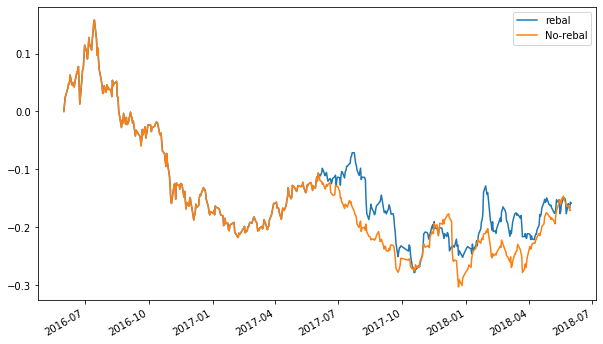

In [32]:
# 이제 리밸런싱이 포함된 저PER 전략 백테스트 결과와 리밸런싱이 없는 경우의 결과를 비교해보자

start_date = '2016-6'
end_date = '2018-5'
initial_money = 100000000

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

total_df = 0
for temp in range(start_year, end_year):
    this_term_start = str(temp) + '-6'
    this_term_end = str(temp+1) + '-6'
    strategy_date = get_strategy_date(this_term_start)
    low_per = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, this_term_start), 'PER', strategy_date, 20)
    per_backtest = backtest_beta(price_df, low_per, this_term_start, this_term_end, initial_money)
    temp_end = per_backtest[this_term_end].index[0]
    per_backtest = per_backtest[:temp_end]
    initial_money =  per_backtest['종합포트폴리오'][-1]
    if temp == start_year:
        total_df = per_backtest
    else:
        total_df = pd.concat([total_df[:-1], per_backtest])
        
total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1

low_per = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', get_strategy_date(start_date), 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

plt.figure(figsize=(10, 6))
total_backtest['총변화율'].plot(label='rebal')
per_backtest['총변화율'].plot(label='No-rebal')
plt.legend()
plt.show()

# 앞 1년은 그래프가 겹쳐 있다. 둘 다 처음 1년은 같은 종목을 가지고 포폴을 구성하기 때문이다.

In [33]:
# 리밸런싱 함수화

def backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, num, value_type=None, value_list=None, date_range=None):
    
    start_year = int(start_date.split('-')[0])
    end_year = int(end_date.split('-')[0])

    total_df = 0
    for temp in range(start_year, end_year):
        this_term_start = str(temp) + '-' + start_date.split('-')[1]
        this_term_end = str(temp+1) + '-' + start_date.split('-')[1]
        strategy_date = get_strategy_date(this_term_start)
        
        if strategy.__name__ == 'high_roa':
            st_df = strategy(select_code_by_price(price_df, fr_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'magic_formula':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_value_rank':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), value_type, strategy_date, num)
        elif strategy.__name__ == 'make_value_combo':
            st_df = strategy(value_list, select_code_by_price(price_df, invest_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_fscore':
            st_df = strategy(select_code_by_price(price_df, fs_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_momentum_rank':
            st_df = strategy(price_df, price_df[this_term_start].index[0] , date_range, num)
        elif strategy.__name__ == 'get_value_quality':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), 
                             select_code_by_price(price_df, fs_df, this_term_start), strategy_date, num)
        
        backtest = backtest_beta(price_df, st_df, this_term_start, this_term_end, initial_money)
        temp_end = backtest[this_term_end].index[0]
        backtest = backtest[:temp_end]
        initial_money = backtest['종합포트폴리오'][-1]
        if temp == start_year:
            total_df = backtest
        else:
            total_df = pd.concat([total_df[:-1], backtest])

    total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
    total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1
    
    return total_df

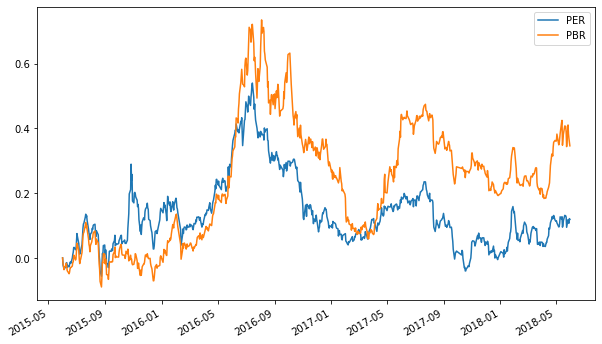

In [34]:
# 저PER과 저PBR 비교

start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = python_quant.get_value_rank

back_test_result1 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')
back_test_result2 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PBR')

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='PER')
back_test_result2['총변화율'].plot(label='PBR')
plt.legend()
plt.show()

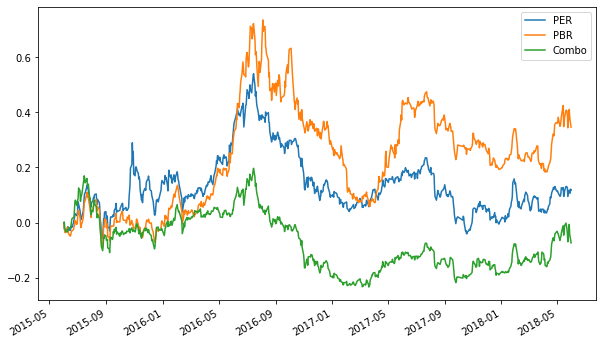

In [35]:
# 저PER과 저PBR, 혼합 전략 비교
start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = python_quant.get_value_rank
strategy2 = python_quant.make_value_combo

back_test_result1 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')
back_test_result2 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PBR')
back_test_result3 = backtest_re(strategy2, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_list=['PER','PBR'])

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='PER')
back_test_result2['총변화율'].plot(label='PBR')
back_test_result3['총변화율'].plot(label='Combo')
plt.legend()
plt.show()

C:\work\hun\python_quant\python_quant.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fscore_df['당기순이익점수'] = fscore_df['당기순이익'] > 0
C:\work\hun\python_quant\python_quant.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fscore_df['영업활동점수'] = fscore_df['영업활동으로인한현금흐름'] > 0
C:\work\hun\python_quant\python_quant.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

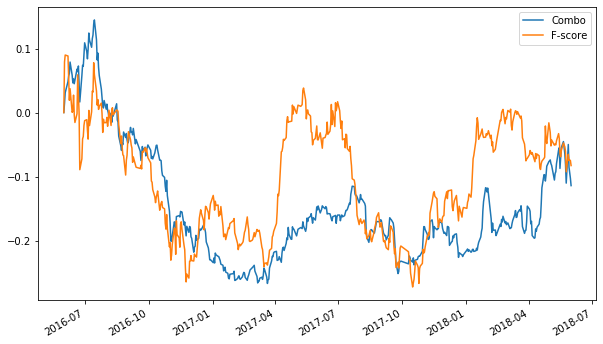

In [36]:
# F-score와 혼합 전략 비교

# start_date = '2015-6' # 가지고 있는데 데이터의 한계
start_date = '2016-6'
end_date = '2018-6'
initial_money = 100000000
strategy1 = python_quant.make_value_combo
strategy2 = python_quant.get_fscore

back_test_result1 = backtest_re(strategy1, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_list=['PER','PBR'])
back_test_result2 = backtest_re(strategy2, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='Combo')
back_test_result2['총변화율'].plot(label='F-score')
plt.legend()
plt.show()

C:\work\hun\python_quant\python_quant.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fscore_df['당기순이익점수'] = fscore_df['당기순이익'] > 0
C:\work\hun\python_quant\python_quant.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fscore_df['영업활동점수'] = fscore_df['영업활동으로인한현금흐름'] > 0
C:\work\hun\python_quant\python_quant.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

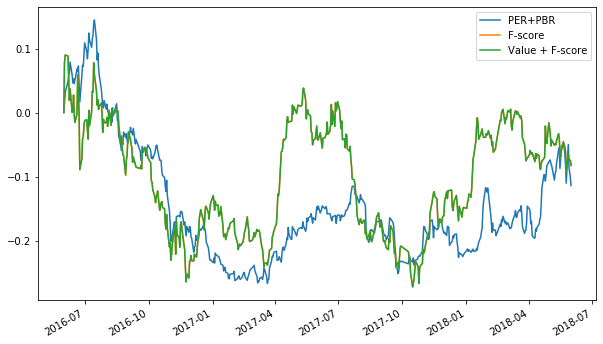

In [37]:
# F-score, PBR+PER, F-score + PBR + PER 3개 전략 비교

start_date = '2016-6'
end_date = '2018-6'
initial_money = 100000000
strategy1 = python_quant.make_value_combo
strategy2 = python_quant.get_fscore
strategy3 = python_quant.get_value_quality

back_test_result1 = backtest_re(strategy1, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_list=['PER','PBR'])
back_test_result2 = backtest_re(strategy2, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)
back_test_result3 = backtest_re(strategy3, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)
# print(back_test_result1, back_test_result2, back_test_result3)
plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='PER+PBR')
back_test_result2['총변화율'].plot(label='F-score')
back_test_result3['총변화율'].plot(label='Value + F-score')
plt.legend()
plt.show()

# 왜 전략2, 3 이 같은 값이 나오지.. 시각화가 그래서 안되는듯..ㅠㅠㅠㅠ

## 5.5 백테스트 평가할 수치들 계산하기

In [38]:
# 백테스트와 관련한 전략을 평가하는 기준이 되는 수치들이 있다. CAGR, MDD 등이 있다.
# CAGR

start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = python_quant.get_value_rank
back_test_result = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')

num_of_year = int(end_date.split('-')[0]) - int(start_date.split('-')[0])
CAGR = (back_test_result.iloc[-1]['종합포트폴리오'] / back_test_result.iloc[0]['종합포트폴리오']) ** (1/num_of_year) -1

In [39]:
# MDD = 최대 낙폭, 고점 대비 최대 손실 비율
# 날짜마다 포폴의 총변화율의 최댓값을 먼저 구하고, 여기에서 오늘의 총변화율을 빼서 MDD를 구한다

max_list = [0]
mdd_list = [0]

for i in back_test_result.index[1:]:
    max_list.append(back_test_result['총변화율'][:i].max())
    if max_list[-1] > max_list[-2]:
        mdd_list.append(0)
    else:
        mdd_list.append(min(back_test_result['총변화율'][i] - max_list[-1], mdd_list[-1]))
        
back_test_result['max'] = max_list
back_test_result['MDD'] = mdd_list

In [40]:
# 그래프가 하나 빠진거 같은데.. 책에도 없음

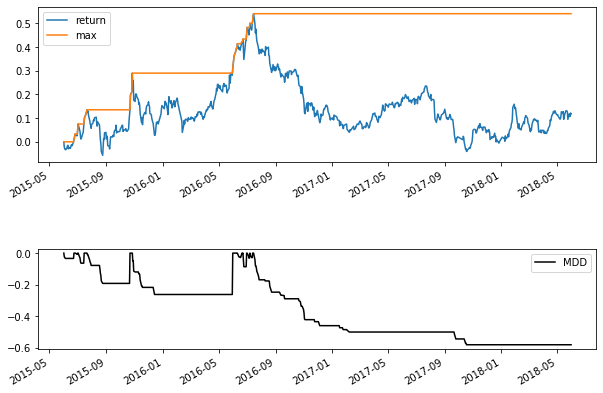

In [41]:
# 위 그래프는 총변화율과 최댓값으로 그린 그래프
# 아래 그래프는 MDD 그래프

plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
back_test_result['총변화율'].plot(label='return')
back_test_result['max'].plot(label='max')
plt.legend()

plt.subplot(3,1,3)
back_test_result['MDD'].plot(label='MDD', c='black')
plt.legend()

In [42]:
# MDD 그래프 함수화, 백테스트한 데이터프레임을 입력으로 넣어주면 max, MDD 칼럼을 추가해 주는 함수
def get_mdd(back_test_df):
    max_list = [0]
    mdd_list = [0]

    for i in back_test_df.index[1:]:
        max_list.append(back_test_df['총변화율'][:i].max())
        if max_list[-1] > max_list[-2]:
            mdd_list.append(0)
        else:
            mdd_list.append(min(back_test_df['총변화율'][i] - max_list[-1], mdd_list[-1])   )

    back_test_df['max'] = max_list
    back_test_df['MDD'] = mdd_list
    
    return back_test_df

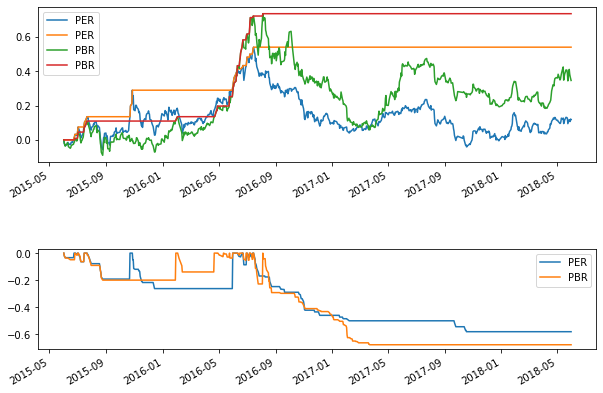

In [43]:
# 저PER과 저PBR 의 MDD 비교하기

start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = python_quant.get_value_rank

back_test_result1 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')
back_test_result2 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PBR')

back_test_result1 = get_mdd(back_test_result1)
back_test_result2 = get_mdd(back_test_result2)

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
back_test_result1['총변화율'].plot(label='PER')
back_test_result1['max'].plot(label='PER')
back_test_result2['총변화율'].plot(label='PBR')
back_test_result2['max'].plot(label='PBR')
plt.legend()

plt.subplot(3, 1, 3)
back_test_result1['MDD'].plot(label='PER')
back_test_result2['MDD'].plot(label='PBR')
plt.legend()